# Importamos librerías

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Cargando datos

In [2]:
df_torneo = pd.read_csv(r'./kcnov22.csv')
# Mostramos las primeras 5 filas
df_torneo.head()

,deck,skill,ndmax,zerotg,zephra,bryan,xenoblur
0,Wounded Heros,Héroe Herido,2022-11-08,False,True,False,False
1,Fish Shark,El alzamiento de Shark,2022-11-08,False,True,False,False
2,Railway,Tren Imparable,2022-11-08,True,False,False,False
3,Code Talker,Codificador Hablador Vivo,2022-11-08,True,False,False,False
4,Salamangreat,Vinculaciones,2022-11-08,True,False,False,False


#### Información del dataframe

In [3]:
df_torneo.info()
# Dimensiones del DataFrame
df_torneo.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   deck      411 non-null    object
 1   skill     411 non-null    object
 2   ndmax     411 non-null    object
 3   zerotg    411 non-null    bool  
 4   zephra    411 non-null    bool  
 5   bryan     411 non-null    bool  
 6   xenoblur  411 non-null    bool  
dtypes: bool(4), object(3)
memory usage: 11.4+ KB


(411, 7)

# Preguntas
1. [ ] Servidores en los que se compartieron más **Decks** 
2. [ ] **Skills** que más se repiten en arquetipos
3. [ ] ¿**Decks** que llegaran a su rangon maximo(**_ndmax_**)?

### Repuesta 1

In [4]:
# Cambiar el tipo de valor
servers = df_torneo.iloc[:, 3:].astype('int').sum()

# Creando DataFrame
comunidad_servers = pd.DataFrame(
            {
            'Servers': servers.to_dict().keys(),
            'Total': servers.to_dict().values(),
            }  
        )

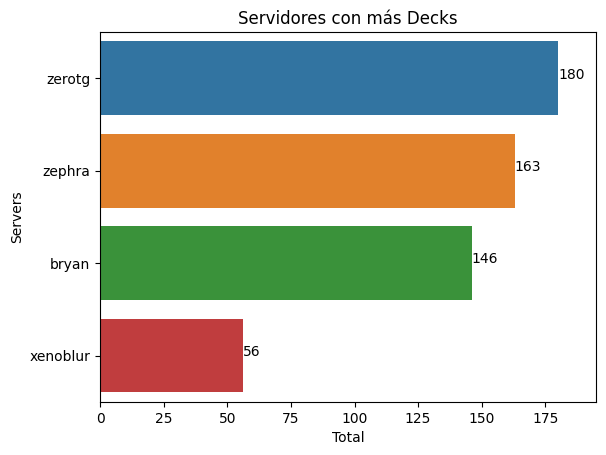

In [5]:
fig, ax = plt.subplots()
plt.xlim(0,195)
# titulo del grafico
plt.title("Servidores con más Decks")

# Creando grafica
sns.barplot(data=comunidad_servers, y='Servers', x='Total')
for pY, pX in enumerate(comunidad_servers.Total):
    ax.annotate(pX, xy=(pX, pY))
plt.show()

In [13]:
df_torneo['day'] = pd.DatetimeIndex(df_torneo['ndmax']).day

dias = (
    df_torneo.groupby(['day'])['day'].count()
    .reset_index(name='total')
)


fig = px.line(dias, x="day", y="total", title="Decks subidos a NDmax por día") 
fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a6513ba3-5a62-40c2-a0cb-de6905e8e618' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>